In [1]:
import pandas as pd
# %matplotlib inline
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
from yellowbrick.text.freqdist import FreqDistVisualizer
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.regressor import ResidualsPlot, AlphaSelection, PredictionError
from binning import BalancedBinningReference
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from yellowbrick.classifier import ClassBalance, ClassPredictionError
from sklearn.preprocessing import MinMaxScaler, minmax_scale
from sklearn.linear_model import SGDRegressor

In [2]:
data = pd.read_csv('goodstuff.csv.xz')

data = data[data['purchaseprice'] > 0]

#mean = data.margin.mean()
# std = data.margin.std()
# data = data[data['margin'] > (mean - 2 * std)]
# data = data[data['margin'] < (mean + 2 * std)]

/home/lwgray/anaconda3/envs/ddl/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (4,6,7,13,15,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data['z_scores'] = np.abs((data.margin-data.margin.mean())/data.margin.std())
data = data[data['z_scores']<= 2.5]
# data['scale_margin'] = minmax_scale(data['margin'])

In [4]:
data[data['margin'] <= 0].shape

(93309, 19)

In [5]:
X_train, X_test, y_train, y_test = tts(data.title, data.margin)

In [6]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(sublinear_tf=True, 
                              strip_accents='unicode',
                              stop_words='english')),
    ('clf', SGDRegressor())
    ]
)

In [7]:
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

mae = mean_absolute_error(y_pred=y_pred, y_true=y_test)
mae

/home/lwgray/anaconda3/envs/ddl/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


93.48677120936345

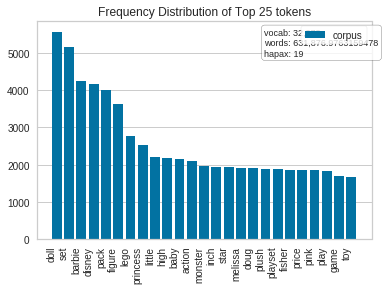

In [8]:
vect = TfidfVectorizer(sublinear_tf=True, 
                              strip_accents='unicode',
                              stop_words='english')
docs = vect.fit_transform(data.title)

features = vect.get_feature_names()

viz = FreqDistVisualizer(features=features, orient='v', n=25)
viz.fit(docs)
viz.poof()

/home/lwgray/anaconda3/envs/ddl/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


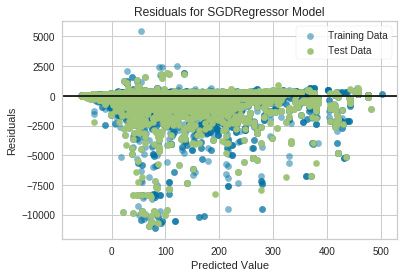

In [9]:
viz = ResidualsPlot(pipeline)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.poof()

/home/lwgray/anaconda3/envs/ddl/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


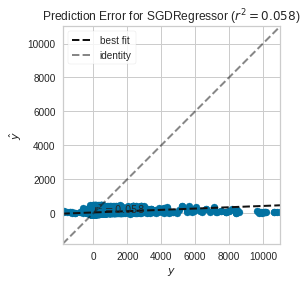

In [10]:
viz = PredictionError(pipeline)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.poof()

In [11]:
viz = BalancedBinningReference(bins=4)
viz.fit(minmax_scale(data.scale_margin))
viz.poof()

AttributeError: 'DataFrame' object has no attribute 'scale_margin'

<Figure size 600x600 with 0 Axes>

In [12]:
data.head()

,amazon_sales_price,asin,date,image,logo,margin,model,model#,pagelink,profit,purchaseprice,salesrank,shipping,sku,store,storepick,title,upc,z_scores
0,75.98,B004QNL2CC,2014-06-08 19:35:45.958895,http://ecx.images-amazon.com/images/I/51LTTrOV...,NaN,47.70,NaN,NaN,http://m.target.com/p/our-generation-20-morgan...,16.69,34.99,17704,NaN,NaN,target,NaN,"Our Generation Poseable Morgan Horse For 18"" D...",062243242999,0.006206
1,21.99,B007GQOCUK,2014-06-08 19:35:45.958895,http://ecx.images-amazon.com/images/I/61zYcBOF...,NaN,43.28,NaN,NaN,http://m.target.com/p/cra-z-art-my-look-color-...,4.54,10.49,147596,NaN,NaN,target,NaN,Cra Z Art My Look Color Your Own Messenger Bag,884920465091,0.007192
2,36.95,B0073FV4CS,2014-06-08 19:35:45.958895,http://ecx.images-amazon.com/images/I/41uWeEHI...,NaN,63.68,NaN,NaN,http://m.target.com/p/beyblade-metal-masters-b...,10.82,16.99,205741,NaN,NaN,target,NaN,Beyblade Metal Fusion Battle Top Faceoff - Bur...,653569721697,0.002643
3,29.95,B00AHVJ9V8,2014-06-08 19:35:45.958895,http://ecx.images-amazon.com/images/I/41TGh7cq...,NaN,40.29,NaN,NaN,http://m.target.com/p/furreal-friends-fancy-ki...,6.04,14.99,106122,NaN,NaN,target,NaN,FurReal Friends Dress Me Babies Fancy Kitty Pet,653569808534,0.007859
4,69.95,B006O3F3KO,2014-06-08 19:35:45.958895,http://ecx.images-amazon.com/images/I/41Dkj6oZ...,NaN,83.81,NaN,NaN,http://m.target.com/p/our-generation-salon-cha...,22.62,26.99,235274,NaN,NaN,target,NaN,Our Generation Purple Salon Chair fits most 18...,062243243408,0.001846
